<center><b>NEURAL NETWORK USING TENSORFLOW</b></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<center><b>GENERATING SAMPLE DATA</b></center>

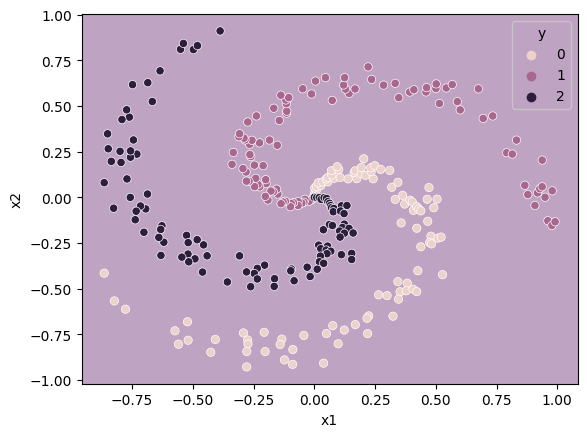

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

X = np.zeros((N*K,D))
y = np.zeros((N*K,1), dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

## visualize data
data = {
    'x1': X[:,0],
    'x2': X[:,1],
    'y': y[:,0]
}
plt.rcParams['axes.facecolor'] = '#bea3c2'
sns.scatterplot(x='x1', y='x2', hue='y', data=data)
plt.show()

<center><b>TRAINING A NEURAL NETWORK WITH 1 HIDDEN LAYER IN TENSORFLOW</b></center>

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units=100, activation='relu',
                kernel_regularizer=tf.keras.regularizers.L2(l2=1e-3)))
model.add(Dense(units=3, activation='softmax',
                kernel_regularizer=tf.keras.regularizers.L2(l2=1e-3)))

In [24]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'],
              optimizer= tf.keras.optimizers.SGD(), run_eagerly=True)

In [25]:
model.fit(X, y, epochs=20000, batch_size=300)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 36ms/step - loss: 0.4269 - accuracy: 0.8567
Epoch 17502/20000
1/1 [==============================] - 0s 33ms/step - loss: 0.4269 - accuracy: 0.8567
Epoch 17503/20000
1/1 [==============================] - 0s 34ms/step - loss: 0.4269 - accuracy: 0.8567
Epoch 17504/20000
1/1 [==============================] - 0s 35ms/step - loss: 0.4269 - accuracy: 0.8567
Epoch 17505/20000
1/1 [==============================] - 0s 36ms/step - loss: 0.4269 - accuracy: 0.8567
Epoch 17506/20000
1/1 [==============================] - 0s 35ms/step - loss: 0.4269 - accuracy: 0.8567
Epoch 17507/20000
1/1 [==============================] - 0s 32ms/step - loss: 0.4269 - accuracy: 0.8567
Epoch 17508/20000
1/1 [==============================] - 0s 36ms/step - loss: 0.4269 - accuracy: 0.8567
Epoch 17509/20000
1/1 [==============================] - 0s 35ms/step - loss: 0.4269 - accuracy: 0.8567
Epoch 17510/20000
1/1 [========

In [26]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (300, 100)                300       
                                                                 
 dense_10 (Dense)            (300, 3)                  303       
                                                                 
Total params: 603 (2.36 KB)
Trainable params: 603 (2.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
